# **IMPORTS**

In [0]:
import tensorflow as tf
import keras as K 
from time import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import backend as K

Using TensorFlow backend.


In [0]:
from keras.models import Model,Sequential
from keras.layers import Layer,Input,Embedding,LSTM,Dropout,Dense,Lambda,Bidirectional

from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import adam,adadelta

In [0]:
import gensim
import numpy as np
import itertools
from nltk.corpus import stopwords
from gensim.models import KeyedVectors,Word2Vec

In [0]:
from nltk.corpus import stopwords


In [0]:
import re
import gensim

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from pathlib import Path


In [0]:
path=Path(base_dir+'Minor/')
path.mkdir(parents=True,exist_ok=True)

In [0]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 25 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,455 kB/s)
debconf: unable to initi

In [0]:
import pytesseract

In [0]:
from PIL import Image

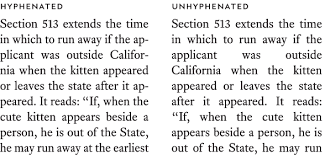

In [0]:
Image.open(base_dir+'Minor/test.png')

In [0]:

pytesseract.image_to_string(Image.open(base_dir+'Minor/test.png'))

'Section 513 extends the time\nin which to run away ifthe ap-\nplicant was outside Califor-\nnia when the kitten appeared\nor leaves the state after it ap-\npeared. It reads: “If, when the\ncute kitten appears beside a\nperson, he is out of the State,\nhe may run away at the earliest.\n\nSection 513 extends the time\nin which to run away if the\napplicant was outside\nCalifornia when the kitten\nappeared or leaves the state\nalter it appeared. It reads\n“If, when the cute kitten\nappears beside a person, he is\n‘out of the State, he may run'

# **Preprocessing**

In [0]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-02-28 19:51:30--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.244.30
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.244.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  15.1MB/s    in 97s     

2020-02-28 19:53:08 (16.2 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [0]:
def text_to_word_list(text):
    
    text = str(text)
    text = text.lower()

    
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    text = text.split()

    return text

In [0]:
def creator(data):
  df=pd.read_csv(path/'Minor_train_data.csv',header=None,names=['QuestionNumber','Answer','Score','CorrectAnswer'])
  sentences=data['Answer'].tolist()
 
  sentences+=data['CorrectAnswer'].tolist()
  
  sentences+=df['Answer'].tolist()
  
  
  sentences+=df['CorrectAnswer'].tolist()
   
  return sentences

In [0]:
def ans_cort(df,vocabs,vocabs_cnt):
  
  stops = set(stopwords.words('english'))
  
  for index, row in df.iterrows():
      for answer in ['Answer','CorrectAnswer']:
            q2n = []  
            for word in text_to_word_list(row[answer]):
                
                if word in stops:
                    continue

                if word not in vocabs:
                    
                    vocabs_cnt += 1
                    vocabs[word] = vocabs_cnt
                    q2n.append(vocabs_cnt)
                else:
                    q2n.append(vocabs[word])

            
            if answer=='Answer':
              df.at[index, 'Answer' + '_n'] = q2n
            else:
              df.at[index, 'Correct' + '_n'] = q2n
  return df,vocabs,vocabs_cnt              

In [0]:
def make_w2v_embeddings(df, embedding_dim=300, empty_w2v=False):
    vocabs = {}
    vocabs_cnt = 0

    vocabs_not_w2v = {}
    vocabs_not_w2v_cnt = 0
    
    sent=creator(df)
    
    word2vec=Word2Vec([s.split() for s in sent],size=300)
        
    word2vec.train(sent, total_examples=len(sent), epochs=10)  

    our_df=pd.read_csv(path/'Minor_train_data.csv',header=None,names=['QuestionNumber','Answer','Score','CorrectAnswer'])
    our_df['Answer_n']=our_df['Answer']
    our_df['Correct_n']=our_df['CorrectAnswer']
    
    our_df,vocabs,vocabs_cnt=ans_cort(our_df,vocabs,vocabs_cnt)
    
    df,vocabs,vocabs_cnt=ans_cort(df,vocabs,vocabs_cnt)
   
  
    embeddings = 1 * np.random.randn(len(vocabs) + 1, embedding_dim)
    embeddings[0] = 0 
    
   
    for word, index in vocabs.items():
        if word in word2vec.wv.vocab:
            embeddings[index] = word2vec.wv.word_vec(word)
    del word2vec

    return df, embeddings,our_df,vocabs

# **DATA**

## **PRE TRAINED DATA**

In [0]:
temp_path=path

In [0]:
temp_p1=temp_path/'Sick.csv'

In [0]:
pre_df=pd.read_csv(temp_p1)

In [0]:
pre_df.head()

,pair_ID,sentence_A,sentence_B,entailment_label,relatedness_score,entailment_AB,entailment_BA,sentence_A_original,sentence_B_original,sentence_A_dataset,sentence_B_dataset,SemEval_set
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,NEUTRAL,4.5,A_neutral_B,B_neutral_A,"A group of children playing in a yard, a man i...","A group of children playing in a yard, a man i...",FLICKR,FLICKR,TRAIN
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,NEUTRAL,3.2,A_contradicts_B,B_neutral_A,"A group of children playing in a yard, a man i...","A group of children playing in a yard, a man i...",FLICKR,FLICKR,TRAIN
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,ENTAILMENT,4.7,A_entails_B,B_entails_A,"The children are playing outdoors, while a man...","The children are playing outdoors, while a man...",FLICKR,FLICKR,TRAIN
3,4,The young boys are playing outdoors and the ma...,There is no boy playing outdoors and there is ...,CONTRADICTION,3.6,A_contradicts_B,B_contradicts_A,"The children are playing outdoors, while a man...","The children are playing outdoors, while a man...",FLICKR,FLICKR,TRIAL
4,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,NEUTRAL,3.4,A_neutral_B,B_neutral_A,"A group of children playing in a yard, a man i...","The children are playing outdoors, while a man...",FLICKR,FLICKR,TRAIN


In [0]:
pre_df.shape

(9840, 12)

In [0]:
answer=pre_df['sentence_A'].tolist()


In [0]:
answer=answer+(pre_df['sentence_B'].tolist())
len(answer)

19680

In [0]:

correct=pre_df['sentence_A_original'].tolist()
correct=correct+pre_df['sentence_B_original'].tolist()
len(correct)

19680

In [0]:
scores=pre_df['relatedness_score'].tolist()
scores+=pre_df['relatedness_score'].tolist()
len(scores)

19680

In [0]:
final_dataset=pd.DataFrame({'Answer':answer ,'CorrectAnswer': correct , 'Score': scores})

In [0]:
final_dataset.head()

,Answer,CorrectAnswer,Score
0,A group of kids is playing in a yard and an ol...,"A group of children playing in a yard, a man i...",4.5
1,A group of children is playing in the house an...,"A group of children playing in a yard, a man i...",3.2
2,The young boys are playing outdoors and the ma...,"The children are playing outdoors, while a man...",4.7
3,The young boys are playing outdoors and the ma...,"The children are playing outdoors, while a man...",3.6
4,The kids are playing outdoors near a man with ...,"A group of children playing in a yard, a man i...",3.4


In [0]:
final_dataset.shape

(19680, 3)

## **EMBEDDING FOR PRETRAIN**

In [0]:
pretrain_df=final_dataset

In [0]:
pretrain_df['Answer_n']=pretrain_df['Answer']
pretrain_df['Correct_n']=pretrain_df['CorrectAnswer']


In [0]:
pretrain_df,embedding,our_df,vocabs=make_w2v_embeddings(pretrain_df,300,False)


In [0]:
vocabs['behaviour']

19

In [0]:
print(embedding.shape)

(2993, 300)


## **Adding padding for pretrained data**

In [0]:
max_length=25

In [0]:
preX=pretrain_df[['Answer_n','Correct_n']]
preY=pretrain_df['Score']

In [0]:
for i in preX:
  preX[i]=pad_sequences(preX[i],truncating='pre',padding='post',maxlen=max_length).tolist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## **Converting into Numpy(PRE)**



In [0]:
def numpyer(X_train):
  temp1=[]
  temp2=[]
  for _,j in X_train['Answer_n'].items(): 
    temp1.append(j)
  temp1=np.array(temp1)
  print(temp1.shape)
  
  for _,j in X_train['Correct_n'].items(): 
    temp2.append(j)
  temp2=np.array(temp2)
  print(temp2.shape)
  return temp1,temp2

In [0]:
temp1,temp2=numpyer(preX)

(19680, 25)
(19680, 25)


In [0]:
preX.head()

,Answer_n,Correct_n
0,"[506, 507, 508, 509, 510, 511, 512, 513, 0, 0,...","[506, 514, 508, 509, 511, 513, 0, 0, 0, 0, 0, ..."
1,"[506, 514, 508, 515, 511, 512, 513, 0, 0, 0, 0...","[506, 514, 508, 509, 511, 513, 0, 0, 0, 0, 0, ..."
2,"[516, 517, 508, 518, 511, 519, 520, 0, 0, 0, 0...","[514, 508, 518, 511, 521, 520, 0, 0, 0, 0, 0, ..."
3,"[516, 517, 508, 518, 511, 519, 520, 0, 0, 0, 0...","[514, 508, 518, 511, 521, 520, 0, 0, 0, 0, 0, ..."
4,"[507, 508, 518, 522, 511, 523, 0, 0, 0, 0, 0, ...","[506, 514, 508, 509, 511, 513, 0, 0, 0, 0, 0, ..."


In [0]:
pre_Y=preY.values

# **Building**

## **building Model(LSTM)**

In [0]:
class MALSTM():
  def __init__(self,n_hidden,embedding_dim,embedding):  
    self.n_hidden=n_hidden
    self.embed_layer=Embedding(embedding.shape[0],embedding_dim,weights=[embedding],trainable=True,mask_zero=True)
    self.shared_LSTM=LSTM(n_hidden,use_bias=True,dropout=0.3)
  def man_dist(self,inputs):
    x1,x2=inputs
    
    return K.clip(K.exp(-K.sum(K.abs(x1-x2),axis=1,keepdims=True))*5,0,5)
   
   
      
  
  
  def model(self,max_length):
    input1=Input(shape=(max_length,),dtype='int32')
    input2=Input(shape=(max_length,),dtype='int32')
    embed1=self.embed_layer(input1)
    embed2=self.embed_layer(input2)
    output1=self.shared_LSTM(embed1)
    output2=self.shared_LSTM(embed2)
    mal_distance=Lambda(self.man_dist)([output1,output2])
    models=Model(inputs=[input1,input2],outputs=mal_distance)
    return models

In [0]:


obj=MALSTM(25,300,embedding)


In [0]:
models=obj.model(max_length)










Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
models.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 25)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 25)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 25, 300)      897900      input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 25)           32600       embedding_1[0][0]          

## **Building Model(bidirectional)**

In [0]:
class BILSTM():
  def __init__(self,n_hidden,embedding_dim,embedding):
    self.n_hidden=n_hidden
    self.embed_layer=Embedding(embedding.shape[0],embedding_dim,weights=[embedding],trainable=True,mask_zero=True)
    self.shared_bi=Bidirectional(LSTM(self.n_hidden,dropout=0.3))
  def man_dist(self,inputs):
    x1,x2=inputs
    return  K.clip(K.exp(-K.sum(K.abs(x1-x2),axis=1,keepdims=True))*5,0,5)
  
  
  def model(self,max_length):
    input1=Input(shape=(max_length,),dtype='int32')
    input2=Input(shape=(max_length,),dtype='int32')
    embed1=self.embed_layer(input1)
    embed2=self.embed_layer(input2)
    output1=self.shared_bi(embed1)
    output2=self.shared_bi(embed2)
    mal_distance=Lambda(self.man_dist)([output1,output2])
    models=Model(inputs=[input1,input2],outputs=mal_distance)
    return models
  

In [0]:
obj_bi=BILSTM(25,300,embedding)

In [0]:
model_bi=obj_bi.model(max_length)

In [0]:
model_bi.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 25)           0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 25)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 25, 300)      897900      input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 50)           65200       embedding_2[0][0]          

## **Building Model(stack LSTM)**

In [0]:
class STACKLSTM():
  def __init__(self,n_hidden,embedding_dim,embedding):
    self.n_hidden=n_hidden
    self.embed_layer=Embedding(embedding.shape[0],embedding_dim,weights=[embedding],trainable=True,mask_zero=True)
    self.shared_LSTM1=LSTM(n_hidden,use_bias=True,return_sequences=True)
    self.shared_LSTM2=LSTM(n_hidden,use_bias=True,dropout=0.3)
  def man_dist(self,inputs):
    x1,x2=inputs
    return  K.clip(K.exp(-K.sum(K.abs(x1-x2),axis=1,keepdims=True))*5,0,5)
  
  
  def model(self,max_length):
    input1=Input(shape=(max_length,),dtype='int32')
    input2=Input(shape=(max_length,),dtype='int32')
    embed1=self.embed_layer(input1)
    embed2=self.embed_layer(input2)
    hid1=self.shared_LSTM1(embed1)
    output1=self.shared_LSTM2(hid1)
    
    hid2=self.shared_LSTM1(embed2)
    output2=self.shared_LSTM2(hid2)
    
    mal_distance=Lambda(self.man_dist)([output1,output2])
    models=Model(inputs=[input1,input2],outputs=mal_distance)
    return models

In [0]:
stacked=STACKLSTM(25,300,embedding)

In [0]:
model_stack=stacked.model(max_length)

In [0]:
model_stack.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 25)           0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 25)           0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 25, 300)      897900      input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
lstm_3 (LSTM)                   (None, 25, 25)       32600       embedding_3[0][0]          

# **Seq2Seq**

In [0]:
np.random.seed(123)
import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout,Input,Average,ReLU,Lambda,Add,Flatten,Concatenate,Multiply,Activation,LSTM,Embedding
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler, ModelCheckpoint 
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop
from keras import regularizers
from keras.models import Model

In [0]:
def seq2seq(input_length,embedding_dim,embedding,hidden_dim):
  en_inp = Input(shape=(input_length,),dtype='int32')
  embed1 = Embedding(embedding.shape[0],embedding_dim,weights=[embedding],trainable=False)(en_inp)
  Lstm1 = LSTM(hidden_dim,return_state = True)
  en_out,state_a,state_c = Lstm1(embed1)

  de_inp = Input(shape=(input_length,),dtype='int32')
  embed2 = Embedding(embedding.shape[0],embedding_dim,weights=[embedding],trainable=False)(de_inp)
  Lstm2 = LSTM(hidden_dim,return_state = True)
  de_out,_,_ = Lstm2(embed2,initial_state = [state_a,state_c])
  
  output = Dense(150,activation = 'tanh')(de_out)
  output = Dense(1,activation = 'sigmoid')(output)
  output = Lambda(lambda x: x*5)(output)
  return Model([en_inp,de_inp],output)




In [0]:
model = seq2seq(max_length,300,embedding,25)

In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 25)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 25)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 25, 300)      897900      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 25, 300)      897900      input_2[0][0]                    
____________________________________________________________________________________________

In [0]:
model.compile(optimizer='adam',loss='mse',metrics=[acc1,pearson])

In [0]:
his = model.fit([temp1,temp2],pre_Y,batch_size=64,epochs = 50,validation_split = 0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 15744 samples, validate on 3936 samples
Epoch 1/50
15744/15744 [==============================] - 18s 1ms/step - loss: 1.0974 - acc1: 0.6566 - pearson: 0.0742 - val_loss: 0.9340 - val_acc1: 0.6870 - val_pearson: 0.0496
Epoch 2/50
15744/15744 [==============================] - 16s 991us/step - loss: 1.0428 - acc1: 0.6609 - pearson: 0.1364 - val_loss: 0.9236 - val_acc1: 0.6910 - val_pearson: 0.0729
Epoch 3/50
15744/15744 [==============================] - 16s 1ms/step - loss: 1.0014 - acc1: 0.6734 - pearson: 0.2287 - val_loss: 0.9105 - val_acc1: 0.6918 - val_pearson: 0.0970
Epoch 4/50
15744/15744 [==============================] - 16s 1ms/step - loss: 0.9724 - acc1: 0.6818 - pearson: 0.2744 - val_loss: 0.9095 - val_acc1: 0.6874 - val_pearson: 0.1104
Epoch 5/50
15744/15744 [==============================] - 16s 994us/step - loss: 0.9413 - acc1: 0.6908 - pearson: 0.3298 - val_loss: 0.87

In [0]:
pt = plotting(his)

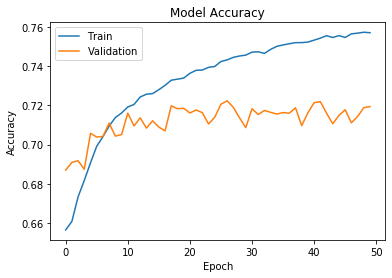

In [0]:
pt.accPlot()

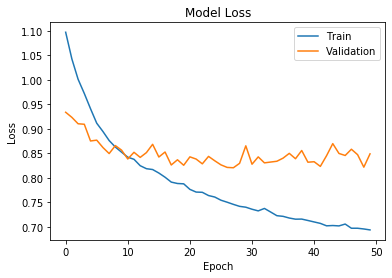

In [0]:
pt.lossPlot()

# **training**

In [0]:
def pearson(y,y_pred):
  return (K.mean(y_pred*y)-K.mean(y_pred)*K.mean(y))/(K.std(y_pred)*K.std(y))

In [0]:
def acc1(y,y_pred):
  return 1-K.mean(K.abs(y-y_pred)/(y))
  

In [0]:
print(temp1.shape,temp2.shape)

(19680, 25) (19680, 25)


## **training(LSTM)**

In [0]:
bs=64

In [0]:
models.compile(optimizer=adam(),loss='mean_squared_error',metrics=[acc1,pearson])

In [0]:
Hist=models.fit([temp1,temp2],pre_Y,bs,10,validation_split=0.2)



Train on 15744 samples, validate on 3936 samples
Epoch 1/10
15744/15744 [==============================] - 37s 2ms/step - loss: 2.2105 - acc1: 0.6049 - pearson: 0.1587 - val_loss: 1.7536 - val_acc1: 0.5713 - val_pearson: 0.2239
Epoch 2/10
15744/15744 [==============================] - 35s 2ms/step - loss: 1.1000 - acc1: 0.6842 - pearson: 0.2764 - val_loss: 1.6926 - val_acc1: 0.5830 - val_pearson: 0.2515
Epoch 3/10
15744/15744 [==============================] - 35s 2ms/step - loss: 1.0074 - acc1: 0.6978 - pearson: 0.3368 - val_loss: 1.6424 - val_acc1: 0.5945 - val_pearson: 0.2644
Epoch 4/10
15744/15744 [==============================] - 34s 2ms/step - loss: 0.9414 - acc1: 0.7101 - pearson: 0.3844 - val_loss: 1.6163 - val_acc1: 0.5979 - val_pearson: 0.2755
Epoch 5/10
15744/15744 [==============================] - 35s 2ms/step - loss: 0.9040 - acc1: 0.7144 - pearson: 0.4114 - val_loss: 1.5740 - val_acc1: 0.6053 - val_pearson: 0.2863
Epoch 6/10
15744/15744 [==============================

## **training(STACK)**

In [0]:
model_stack.compile(optimizer=adam(),loss='mean_squared_error',metrics=[acc1,pearson])

In [0]:
Hist_stack=model_stack.fit([temp1,temp2],pre_Y,bs,10,validation_split=0.2)

Train on 15744 samples, validate on 3936 samples
Epoch 1/10
15744/15744 [==============================] - 69s 4ms/step - loss: 1.1362 - acc1: 0.6633 - pearson: 0.1938 - val_loss: 1.4099 - val_acc1: 0.6104 - val_pearson: 0.2834
Epoch 2/10
15744/15744 [==============================] - 65s 4ms/step - loss: 0.9351 - acc1: 0.6926 - pearson: 0.3438 - val_loss: 1.3294 - val_acc1: 0.6273 - val_pearson: 0.3051
Epoch 3/10
15744/15744 [==============================] - 66s 4ms/step - loss: 0.8613 - acc1: 0.7085 - pearson: 0.4243 - val_loss: 1.3094 - val_acc1: 0.6319 - val_pearson: 0.3095
Epoch 4/10
15744/15744 [==============================] - 65s 4ms/step - loss: 0.8194 - acc1: 0.7199 - pearson: 0.4663 - val_loss: 1.2683 - val_acc1: 0.6410 - val_pearson: 0.3311
Epoch 5/10
15744/15744 [==============================] - 65s 4ms/step - loss: 0.7893 - acc1: 0.7283 - pearson: 0.4914 - val_loss: 1.2541 - val_acc1: 0.6446 - val_pearson: 0.3331
Epoch 6/10
15744/15744 [==============================] 

## **training(Bidirectional)**

In [0]:
model_bi.compile(optimizer=adam(),loss='mean_squared_error',metrics=[acc1,pearson])

In [0]:
hist_bi=model_bi.fit([temp1,temp2],pre_Y,bs,10,validation_split=0.2)

Train on 15744 samples, validate on 3936 samples
Epoch 1/10
15744/15744 [==============================] - 79s 5ms/step - loss: 2.9546 - acc1: 0.5607 - pearson: 0.1191 - val_loss: 1.7272 - val_acc1: 0.5780 - val_pearson: 0.2235
Epoch 2/10
15744/15744 [==============================] - 76s 5ms/step - loss: 1.1597 - acc1: 0.6784 - pearson: 0.2539 - val_loss: 1.6635 - val_acc1: 0.5896 - val_pearson: 0.2547
Epoch 3/10
15744/15744 [==============================] - 75s 5ms/step - loss: 1.0397 - acc1: 0.6949 - pearson: 0.3281 - val_loss: 1.6114 - val_acc1: 0.5999 - val_pearson: 0.2784
Epoch 4/10
15744/15744 [==============================] - 75s 5ms/step - loss: 0.9596 - acc1: 0.7062 - pearson: 0.3774 - val_loss: 1.5493 - val_acc1: 0.6092 - val_pearson: 0.2913
Epoch 5/10
15744/15744 [==============================] - 76s 5ms/step - loss: 0.9085 - acc1: 0.7140 - pearson: 0.4118 - val_loss: 1.5402 - val_acc1: 0.6079 - val_pearson: 0.2984
Epoch 6/10
15744/15744 [==============================] 

# **plots**

In [0]:
class plotting():
  def __init__(self,mod):
    self.mod=mod
    
  def accPlot(self):
    plt.plot(self.mod.history['acc1'])
    plt.plot(self.mod.history['val_acc1'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
  def lossPlot(self):
    plt.plot(self.mod.history['loss'])
    plt.plot(self.mod.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')


## **plot for LSTM**

In [0]:
pt=plotting(Hist)

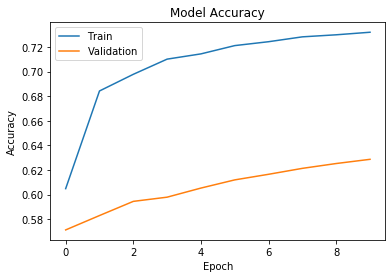

In [0]:
pt.accPlot()

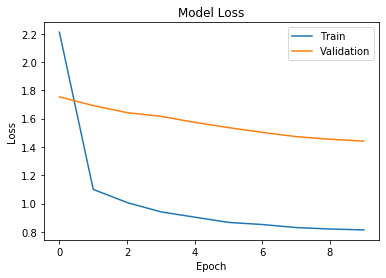

In [0]:
pt.lossPlot()

In [0]:
models.save(path/'MODEL')

## **plot for STACK**

In [0]:
pt_stack=plotting(Hist_stack)

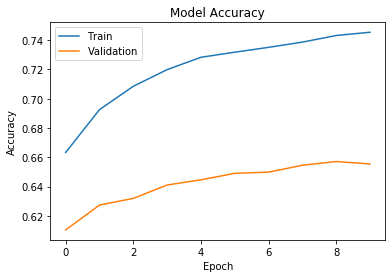

In [0]:
pt_stack.accPlot()

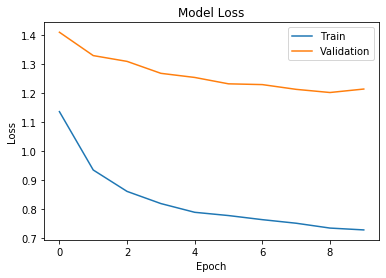

In [0]:
pt_stack.lossPlot()

In [0]:
model_stack.save(path/'MODEL_STACK')

## **PLOT FOR BIDIRECTIONAL**

In [0]:
pt_bi=plotting(hist_bi)

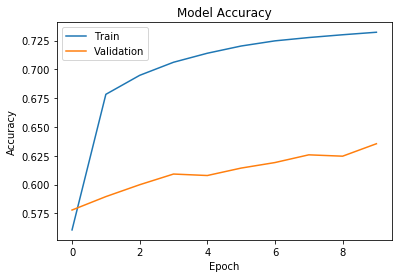

In [0]:
pt_bi.accPlot()

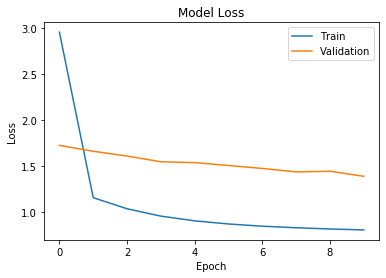

In [0]:
pt_bi.lossPlot()

In [0]:
model_bi.save(path/'MODEL_BIDIRECTIONAL')

# **OUR DATA**

## **loading data**

In [0]:
our_df.head(40)

,QuestionNumber,Answer,Score,CorrectAnswer,Answer_n,Correct_n
0,1.1,High risk problems are address in the prototyp...,3.5,To simulate the behaviour of portions of the d...,"[1, 2, 3, 4, 5, 6, 7, 8, 6, 9, 5, 10, 11, 12, ...","[18, 19, 20, 21, 15, 22]"
1,1.1,To simulate portions of the desired final prod...,5.0,To simulate the behaviour of portions of the d...,"[18, 20, 21, 23, 22, 24, 25, 6, 26, 27, 28, 29...","[18, 19, 20, 21, 15, 22]"
2,1.1,A prototype program simulates the behaviors of...,4.0,To simulate the behaviour of portions of the d...,"[5, 6, 35, 36, 20, 21, 15, 22, 37, 38, 39]","[18, 19, 20, 21, 15, 22]"
3,1.1,Defined in the Specification phase a prototype...,5.0,To simulate the behaviour of portions of the d...,"[40, 41, 42, 5, 43, 44, 20, 21, 15, 22, 45, 46...","[18, 19, 20, 21, 15, 22]"
4,1.1,It is used to let the users have a first idea ...,3.0,To simulate the behaviour of portions of the d...,"[12, 52, 53, 54, 55, 56, 6, 37, 57, 58, 6, 59,...","[18, 19, 20, 21, 15, 22]"
5,1.1,To find problem and errors in a program before...,2.0,To simulate the behaviour of portions of the d...,"[66, 32, 67, 6, 68]","[18, 19, 20, 21, 15, 22]"
6,1.1,To address major issues in the creation of the...,2.5,To simulate the behaviour of portions of the d...,"[4, 69, 70, 71, 6, 29, 72, 73, 74, 6, 73, 75, ...","[18, 19, 20, 21, 15, 22]"
7,1.1,you can break the whole program into prototype...,5.0,To simulate the behaviour of portions of the d...,"[77, 78, 6, 5, 79, 18, 80, 23, 6]","[18, 19, 20, 21, 15, 22]"
8,1.1,To provide an example or model of how the fini...,3.5,To simulate the behaviour of portions of the d...,"[81, 82, 83, 84, 6, 85, 86, 87, 88, 89, 90, 86...","[18, 19, 20, 21, 15, 22]"
9,1.1,Simulating the behavior of only a portion of t...,5.0,To simulate the behaviour of portions of the d...,"[94, 44, 95, 21, 15, 22]","[18, 19, 20, 21, 15, 22]"


## **PADDING**

In [0]:
X_train=our_df[['Answer_n','Correct_n']]
Y_train=our_df['Score']

In [0]:
for i in X_train:
  X_train[i]=pad_sequences(X_train[i],truncating='pre',padding='post',maxlen=max_length).tolist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
X_train

,Answer_n,Correct_n
0,"[1, 2, 3, 4, 5, 6, 7, 8, 6, 9, 5, 10, 11, 12, ...","[18, 19, 20, 21, 15, 22, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[18, 20, 21, 23, 22, 24, 25, 6, 26, 27, 28, 29...","[18, 19, 20, 21, 15, 22, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[5, 6, 35, 36, 20, 21, 15, 22, 37, 38, 39, 0, ...","[18, 19, 20, 21, 15, 22, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[40, 41, 42, 5, 43, 44, 20, 21, 15, 22, 45, 46...","[18, 19, 20, 21, 15, 22, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[12, 52, 53, 54, 55, 56, 6, 37, 57, 58, 6, 59,...","[18, 19, 20, 21, 15, 22, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
133,"[500, 402, 142, 254, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[361, 472, 478, 6, 472, 479, 127, 480, 361, 48..."
134,"[478, 161, 494, 504, 161, 478, 0, 0, 0, 0, 0, ...","[361, 472, 478, 6, 472, 479, 127, 480, 361, 48..."
135,"[12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[361, 472, 478, 6, 472, 479, 127, 480, 361, 48..."
136,"[478, 505, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[361, 472, 478, 6, 472, 479, 127, 480, 361, 48..."


## **Converting into numpy**

In [0]:
temp3,temp4=numpyer(X_train)

(138, 25)
(138, 25)


In [0]:
Y_train=Y_train.values

# **TEST**

In [0]:
print(temp3.shape,temp4.shape)

(138, 25) (138, 25)


In [0]:
y_pred=model.predict([temp3,temp4])


In [0]:
y_pred

array([[3.7357326],
       [3.8299754],
       [3.8807633],
       [3.7803981],
       [3.43931  ],
       [3.7836528],
       [3.6377141],
       [3.676918 ],
       [3.7606459],
       [3.7317874],
       [3.749057 ],
       [3.802496 ],
       [3.6713564],
       [3.7436934],
       [3.1703787],
       [3.530476 ],
       [3.802496 ],
       [3.691301 ],
       [3.6270952],
       [3.7685478],
       [3.8009095],
       [3.8009095],
       [3.7247183],
       [3.9558291],
       [4.0004272],
       [4.0343103],
       [3.998835 ],
       [4.037807 ],
       [3.9602876],
       [3.966876 ],
       [3.937341 ],
       [3.9142942],
       [3.9519765],
       [3.960438 ],
       [4.0314646],
       [3.9679027],
       [3.9040291],
       [3.9377654],
       [3.9720073],
       [3.9781718],
       [4.0429616],
       [3.9679027],
       [4.0703483],
       [3.966876 ],
       [3.9491467],
       [3.966876 ],
       [2.9448347],
       [3.3323355],
       [2.5624704],
       [3.179177 ],


In [0]:
y_pred=models.predict([temp3,temp4])


NameError: ignored

In [0]:
y_pred_stack=model_stack.predict([temp3,temp4])


In [0]:
y_pred_bi=model_bi.predict([temp3,temp4])


In [0]:
Y_train

array([3.5, 5. , 4. , 5. , 3. , 2. , 2.5, 5. , 3.5, 5. , 5. , 5. , 2. ,
       4.5, 2. , 4.5, 5. , 2. , 2. , 2.5, 5. , 5. , 1.5, 3.5, 4. , 4.5,
       3. , 3. , 2. , 3.5, 4. , 2. , 5. , 2.5, 3.5, 2. , 3. , 1.5, 5. ,
       3.5, 1.5, 2.5, 1.5, 3. , 5. , 3.5, 4.5, 5. , 3.5, 2.5, 3.5, 1. ,
       4. , 2.5, 3. , 4. , 5. , 3.5, 2. , 3.5, 4.5, 5. , 4.5, 3.5, 4. ,
       4.5, 3.5, 3.5, 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 0. , 5. ,
       5. , 5. , 5. , 2.5, 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. ,
       5. , 2. , 4.5, 5. , 5. , 5. , 3.5, 4. , 5. , 4. , 5. , 5. , 5. ,
       3. , 4. , 5. , 5. , 4. , 4.5, 4.5, 4.5, 3.5, 5. , 3.5, 2. , 3. ,
       5. , 4.5, 4. , 2.5, 5. , 5. , 2. , 4.5, 3. , 2.5, 1.5, 5. , 2.5,
       3.5, 2. , 2.5, 1. , 3. , 2. , 3.5, 2.5])

In [0]:
def accurate(y,y_pre):
  ans=0
  for i,j in enumerate(y):
    if j!=0 :
      ans += abs(j-y_pre[i])/j
  ans = ans/y.shape[0]   
  return 1-ans

In [0]:
table=pd.DataFrame(list(our_df['Answer'][20:24]),columns=['SENTENCE'])

In [0]:
table['GROUND TRUTH']=Y_train[20:24]
table['MALSTM']=y_pred[20:24]
table['MASLSTM']=(y_pred_stack[20:24])
table['MABLSTM']=(y_pred_bi[20:24])

In [0]:
table.at[1,'SENTENCE']=our_df['Answer'][26]


In [0]:
table.head()

,SENTENCE,GROUND TRUTH,MALSTM,MASLSTM,MABLSTM
0,it simulates the behavior of portions of the d...,5.0,4.943291,4.853374,4.534870
1,In RUP the stages in the software life cycle a...,5.0,4.943291,4.853374,4.534870
2,A prototype program is used in problem solving...,1.5,0.678165,2.762904,1.681617
3,Refining and possibly the design if the testin...,3.5,0.032723,2.815506,0.006436


In [0]:
y_pred[:10]

array([[3.7357326],
       [3.8299754],
       [3.8807633],
       [3.7803981],
       [3.43931  ],
       [3.7836528],
       [3.6377141],
       [3.676918 ],
       [3.7606459],
       [3.7317874]], dtype=float32)

In [0]:
y_pred[:10]

In [0]:
y_pred_stack[:10]

array([[2.3073244],
       [2.3576195],
       [2.7211375],
       [2.7047513],
       [1.5817236],
       [2.2481139],
       [2.3438067],
       [3.4693856],
       [2.8828275],
       [3.9236023]], dtype=float32)

In [0]:
y_pred_bi[:10]

array([[1.1588485e+00],
       [4.0042779e-04],
       [7.3284811e-01],
       [8.0257365e-03],
       [1.4102890e-04],
       [4.3314141e-03],
       [1.0163919e-06],
       [2.4998813e+00],
       [1.4779031e+00],
       [3.1481485e+00]], dtype=float32)

In [0]:
accurate(Y_train,y_pred)[0]

0.6298064

In [0]:
accurate(Y_train,y_pred)[0]

0.35655445

In [0]:
accurate(Y_train,y_pred_stack)[0]

0.6868739

In [0]:
accurate(Y_train,y_pred_bi)[0]

0.28644907